#### Calories Burnt Prediction


- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project explores how calorie burn depends on user activity and physiological variables such as Gender,	Age,Height,	Weight,	Duration,	Heart_Rate	and Body_Temp.
# - Goal:
 - Build a machine learning model to **predict calories burned** based on user activity and physiological features.



### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos
- The data consists of 9 column and 15000 rows.
### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame and merge input and output dataset

In [2]:


# Read the CSV files
df1 = pd.read_csv(r"C:\Data science\calorie count\calories (1).csv")
df2 = pd.read_csv(r"C:\Data science\calorie count\exercise.csv")


df2['Calories'] = df1['Calories']
df2.head()
df2.tail()


User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0

#### Shape of the dataset

In [3]:
df2.shape

(15000, 9)

### 2.2 Dataset information
- gender : sex of students  -> (Male/female)
- age : age of a user
- height: height of a user in cm
- weight : weight of a user in Kg
- Duration : duration of a user activity in minutes
- heart rate 
- body temperature
### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column
### 3.1 Check Missing values


In [1]:
df2.isna().sum()


NameError: name 'df2' is not defined

#### There are no missing values in the data set
### 3.2 Check Duplicates

In [ ]:
df2.duplicated().sum()

np.int64(0)

### 3.3 Check data types

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### 3.4 Checking the number of unique values of each column

In [ ]:
df2.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

### 3.5 Check statistics of data set

In [ ]:
df2.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

Insight
 
 -Workouts vary from 1 to 30 minutes. Most people exercise around
   15 minutes (median = 16 mins). Data is evenly distributed.

 -Normal exercise heart rate range. Some users have high heart rates (possibly intense workouts or low fitness).

 -Body Temperature Elevated due to exercise. Most people are between 39.6°C and 40.6°C post-exercise.

 

### 3.7 Exploring Data

In [ ]:
numeric_features=[ feature for feature in df2.columns if df2[feature].dtype != 'O']
categorical_features=[ feature for feature in df2.columns if df2[feature].dtype == 'O']
print(" We have {} numerical features :{}".format(len(numeric_features), numeric_features))
print(" We have {} categorical features :{}".format(len(categorical_features), categorical_features))

 We have 8 numerical features :['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
 We have 1 categorical features :['Gender']


### 4. Exploring Data ( Visualization )


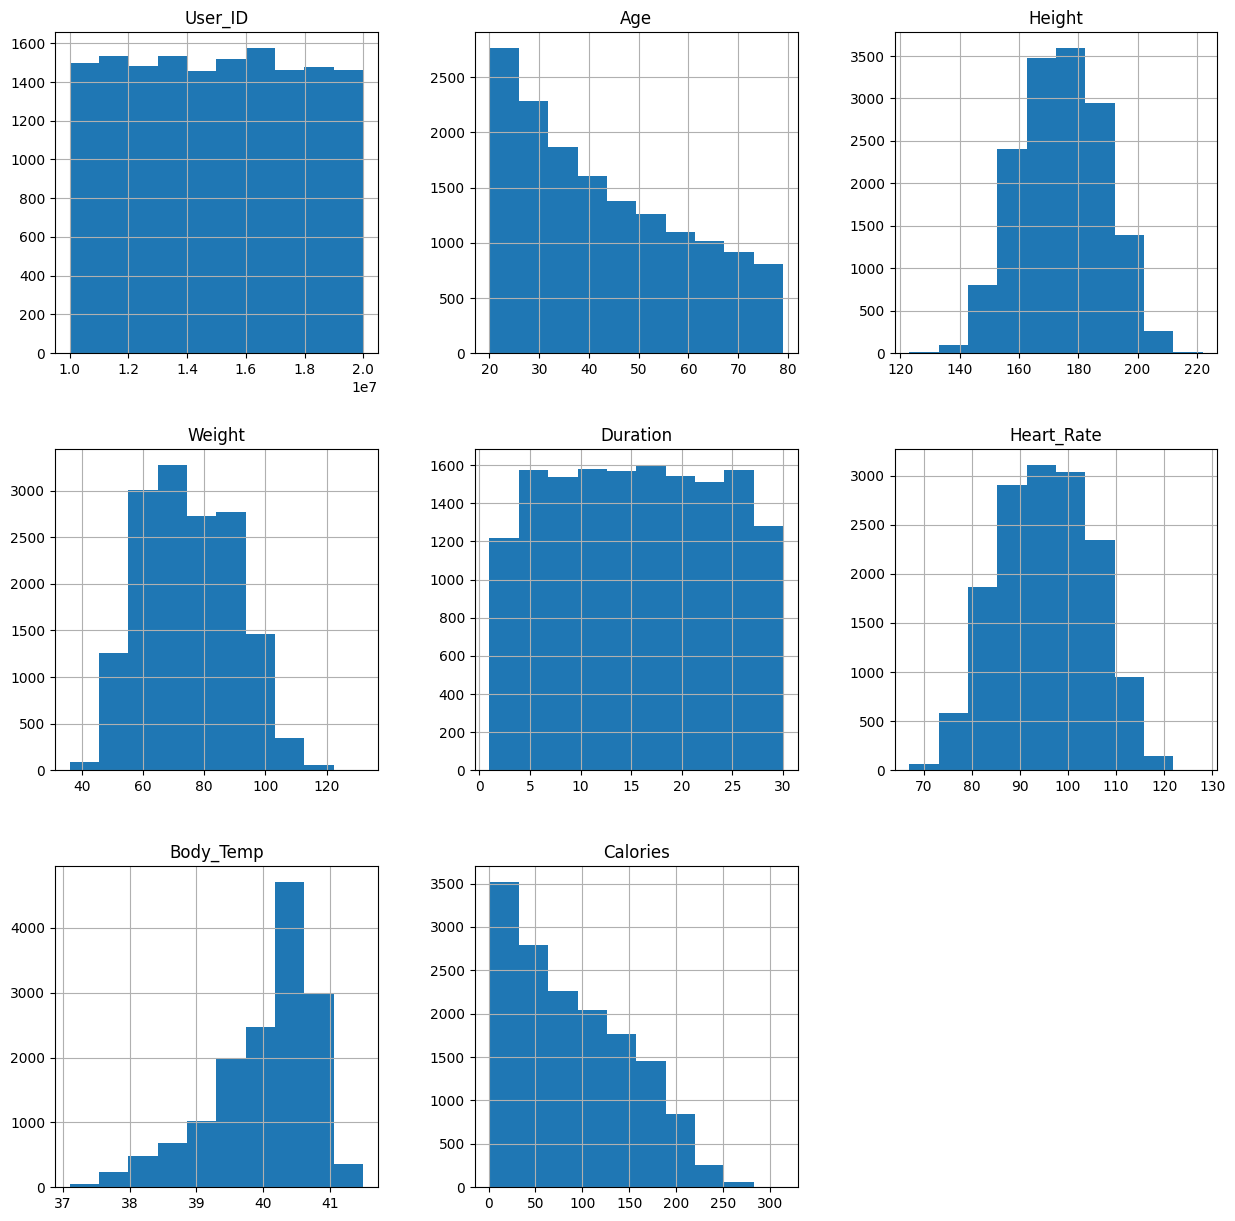

In [ ]:
df2.hist(figsize=(15,15))
plt.show()

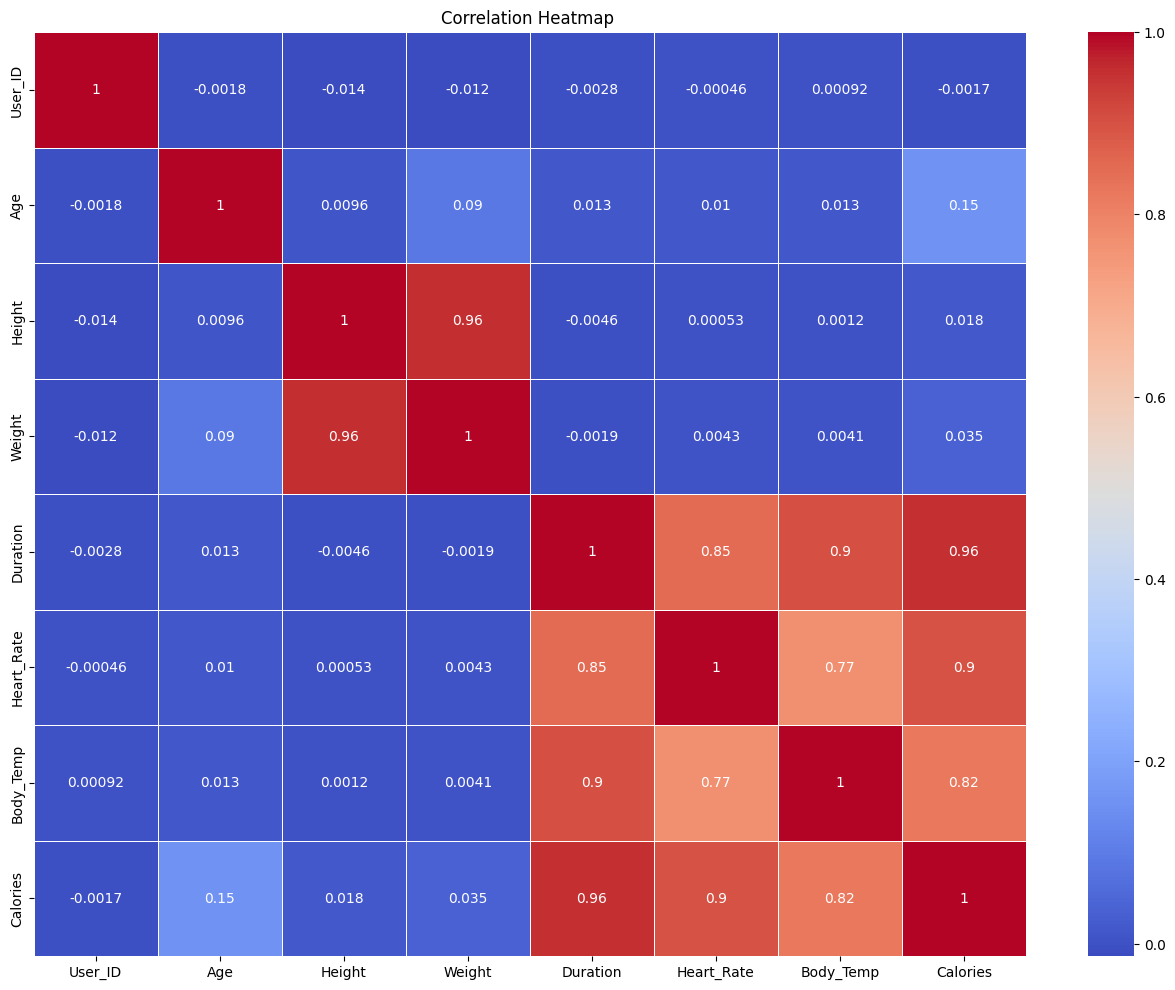

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.show()

### Duration vs Calories

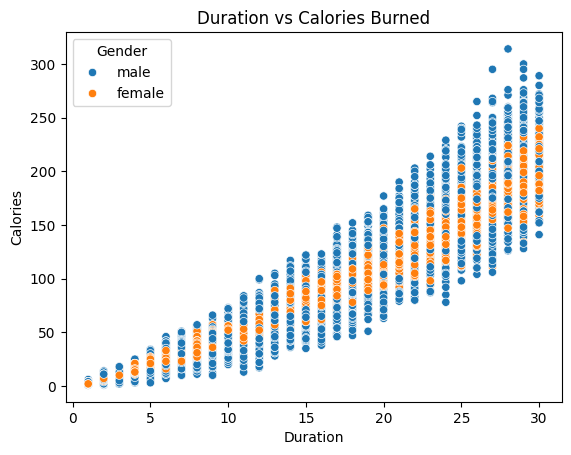

In [ ]:
sns.scatterplot(data=df2, x='Duration', y='Calories', hue='Gender')
plt.title("Duration vs Calories Burned")
plt.show()


### insight 
--There is a strong positive correlation between workout duration and calories burned, indicating that duration is a key factor in energy expenditure.

--Males tend to burn more calories than females for the same workout durations, likely due to physiological differences.

--Calorie burn shows greater variance at higher durations, suggesting the influence of other factors like body weight, age, or heart rate.

--The distribution of points shows that while duration is predictive, additional features should be considered for accurate calorie burn estimation.

### Heart rate vs calories

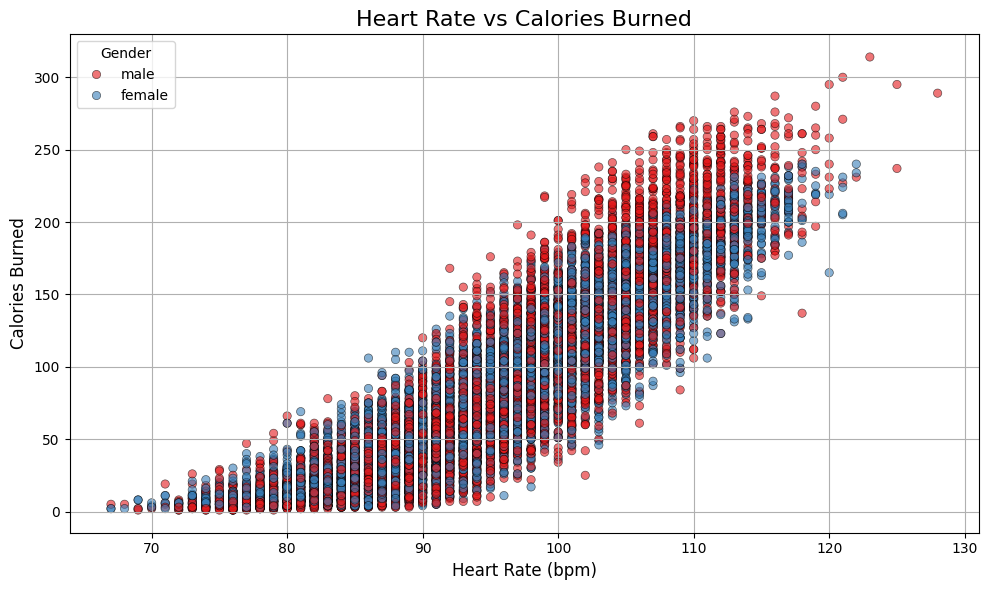

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2,x='Heart_Rate',y='Calories',hue='Gender',alpha=0.6,palette='Set1',edgecolor='black')

plt.title("Heart Rate vs Calories Burned", fontsize=16)
plt.xlabel("Heart Rate (bpm)", fontsize=12)
plt.ylabel("Calories Burned", fontsize=12)
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


### insight
Heart rate is a reliable indicator of calorie expenditure.

Males burn more calories than females for the same heart rate range.

The relationship is not perfectly linear, and other factors (e.g., duration, weight) likely influence calorie burn.

At high heart rates, the difference in calorie burn between individuals increases, indicating varied workout intensities or durations.



### Calories vs Gender

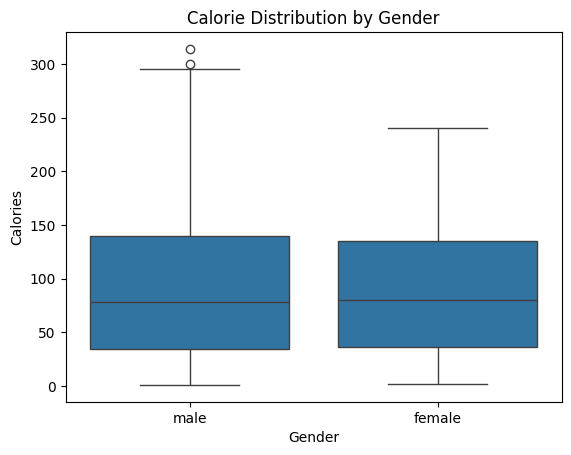

In [ ]:
sns.boxplot(data=df2, x='Gender', y='Calories')
plt.title("Calorie Distribution by Gender")
plt.show()


 Outliers maybe valid, e.g., someone exercised longer or harder than average, leading to higher calorie burn.

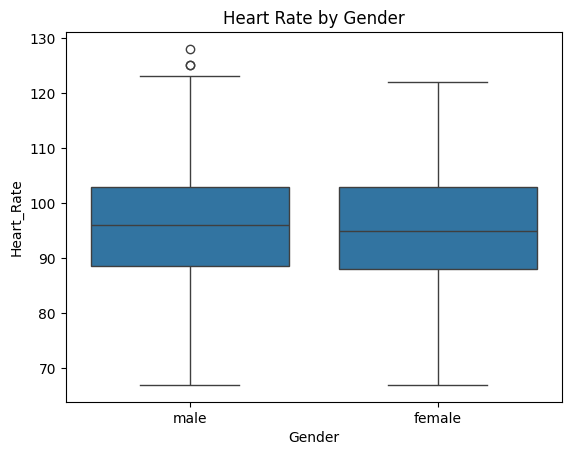

In [ ]:
sns.boxplot(data=df2, x='Gender', y='Heart_Rate')
plt.title("Heart Rate by Gender")
plt.show()


This box plot shows that both male and female participants exhibit similar heart rate distributions during exercise. Median and interquartile ranges are nearly identical. Therefore, gender-based differences in calorie burn are likely not due to heart rate, but could be influenced by other variables such as body weight or workout duration.



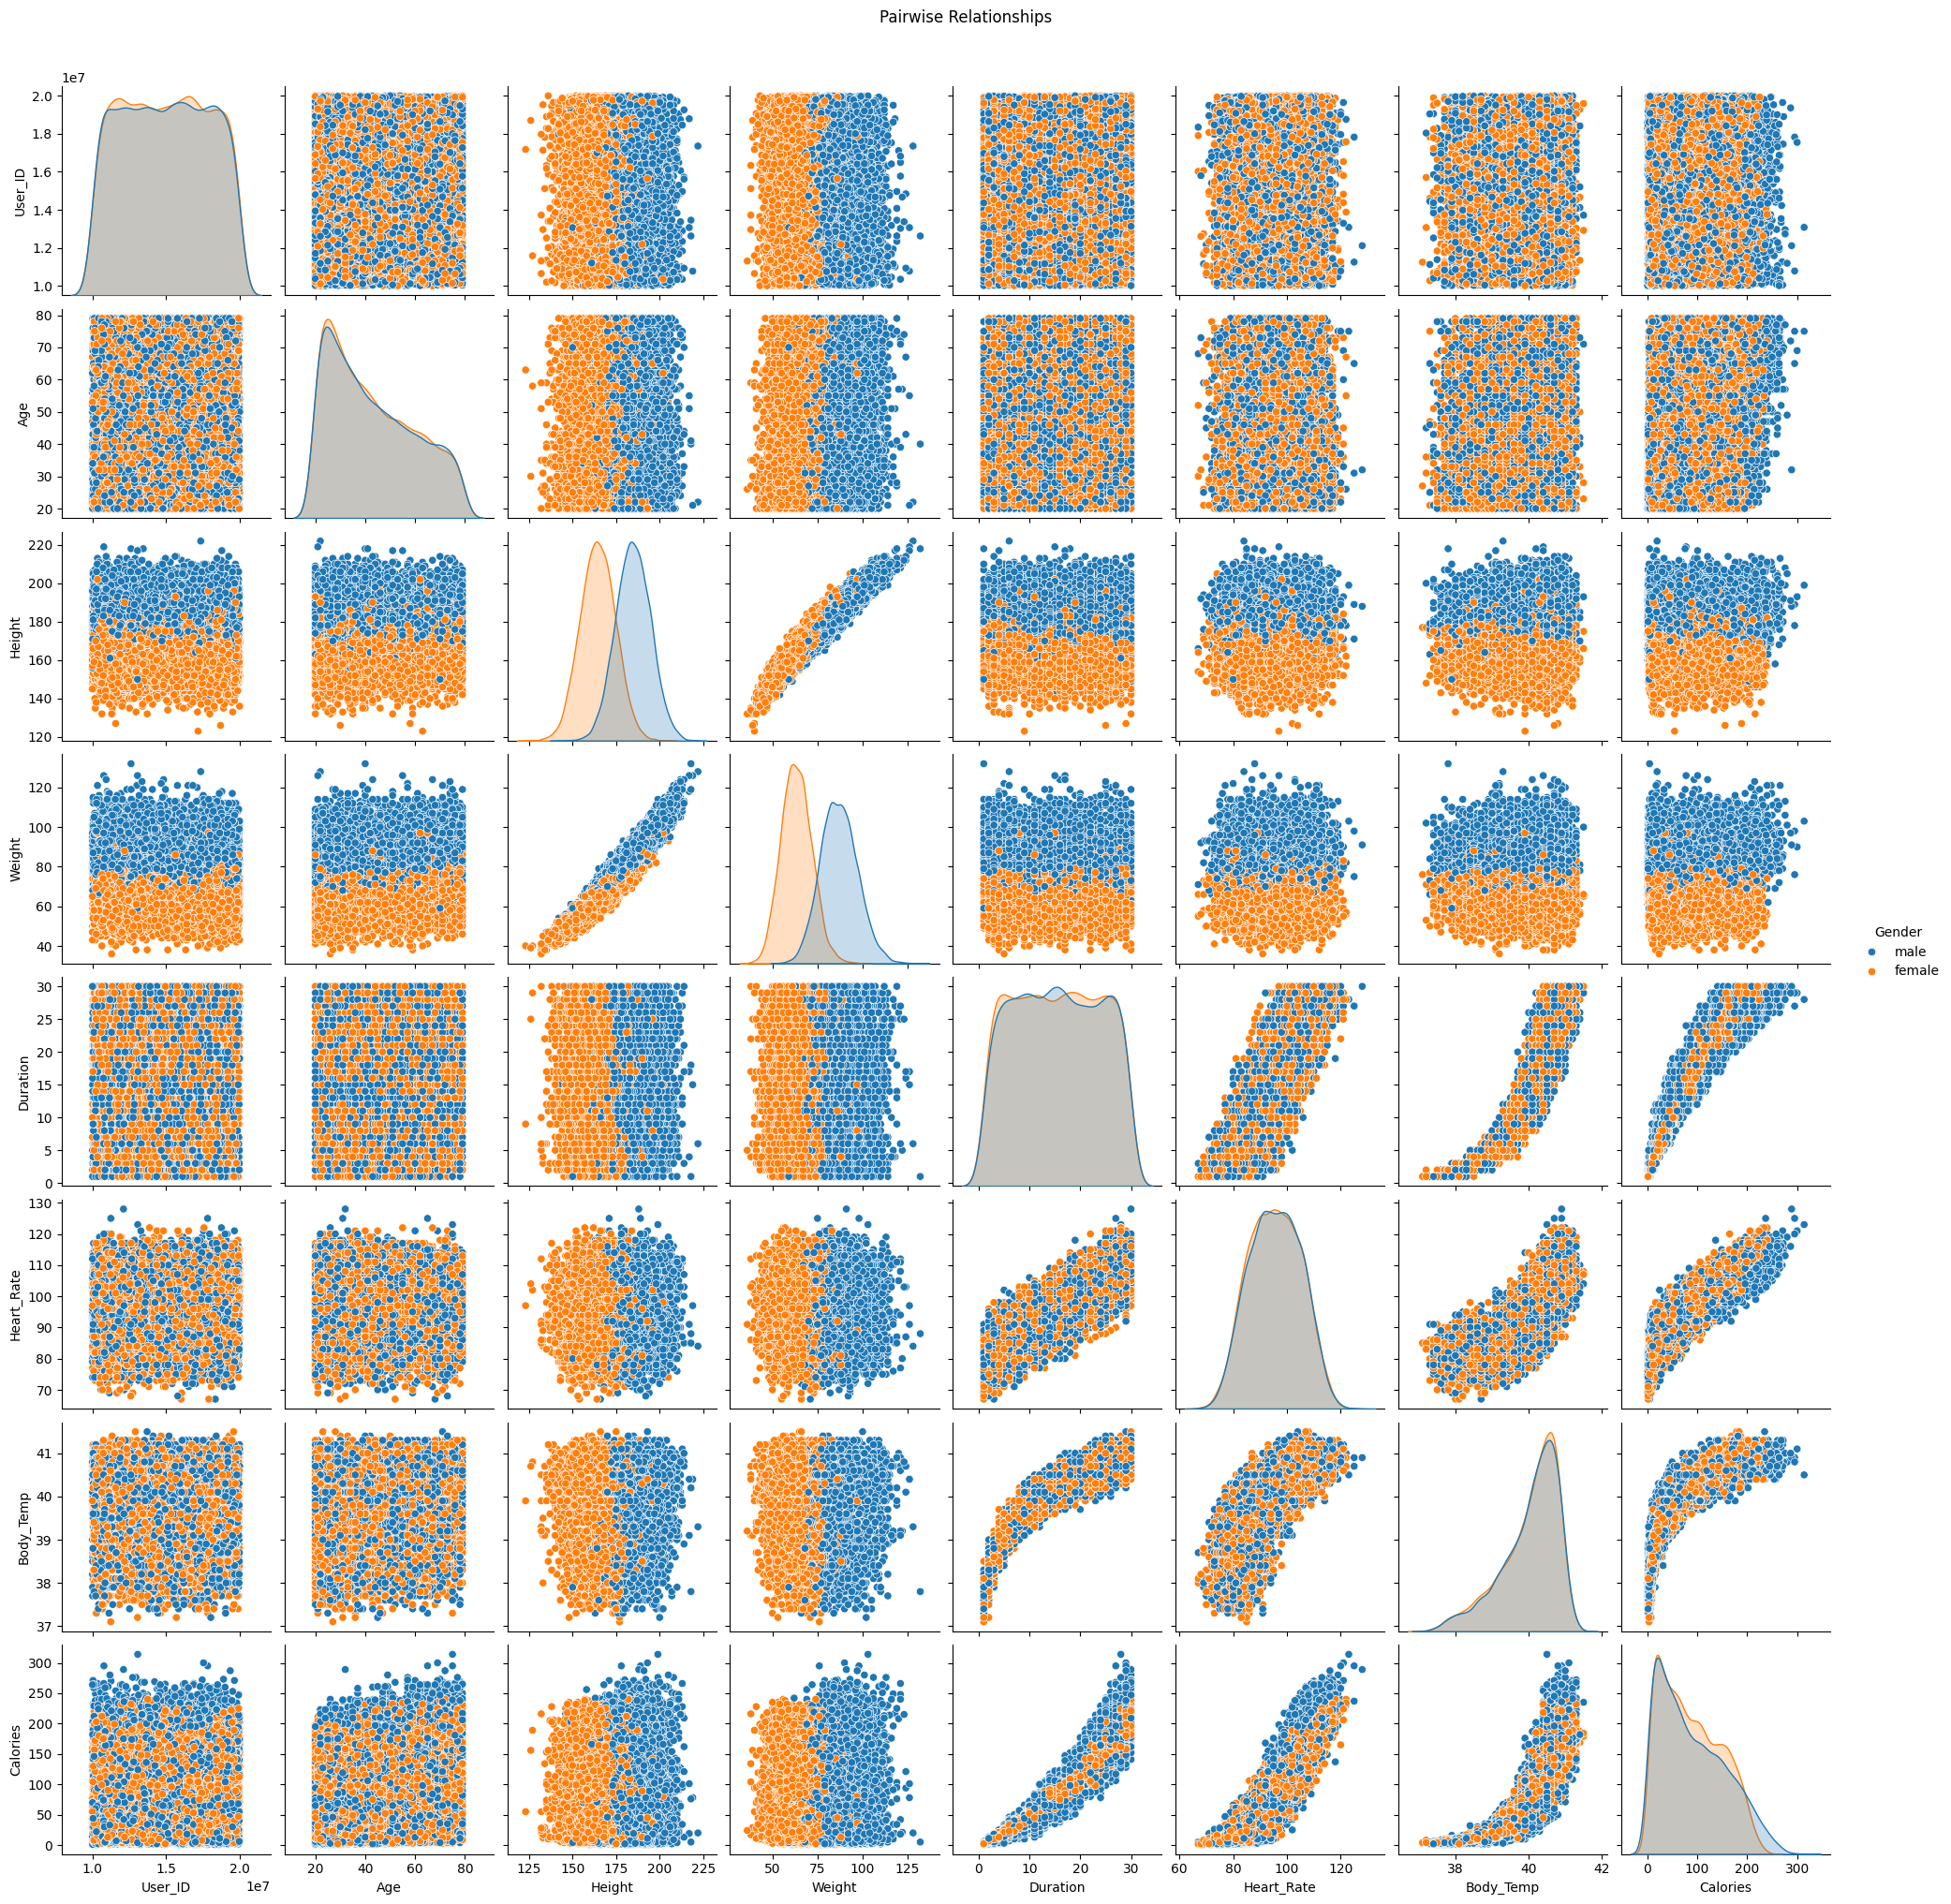

In [ ]:
sns.pairplot(df2[numeric_features + ['Gender']], hue='Gender')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


## Conclusion
The analysis revealed strong correlations between calories burned and features such as duration of workout, heart rate, and weight, indicating that these are key predictors of energy expenditure.

Workout duration showed the highest correlation with calories burned, confirming that longer sessions lead to higher calorie burn.

Gender-based patterns suggest that males generally burn more calories than females for similar durations or heart rates, likely due to physiological factors like higher average body weight or muscle mass.

Despite similar heart rate distributions across genders, calorie burn still varies, emphasizing that multiple factors (not just heart rate) play a role in calorie expenditure.

Visualizations like scatter plots, box plots, and pair plots helped identify trends, relationships, and potential outliers. These insights are valuable for designing personalized fitness or diet plans.

The dataset had no missing values or duplicates, ensuring clean and reliable input for model training.